To do
<br> decide better trading universe like including bond and commodity etf
<br> make loss function calculate actual sharpe by reducing to daily returns first and then taking variance
<br> compare performance with just using sign to predict and then equal weighting
<br> trade taken on EOD close but signal based on close..might have to lag signals

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import ta as ta

# Download required prices

In [2]:
df_prices = yf.download("SPY XLY XLP XLE XLF XLV XLB XLI XLU XLK RWR", start="2003-01-01", end="2019-11-14")['Adj Close']

[*********************100%***********************]  11 of 11 completed


# Build technical indicators/returns

In [3]:
df_trend = df_prices.apply(lambda col: ta.trend.macd(col)/col.rolling(63).std()).add_suffix('_trend')  #MACD/rolling 63 day stddev
df_returns1 = df_prices.pct_change(1).add_suffix('_1day')
df_returns5 = df_prices.pct_change(5).add_suffix('_5day')

In [4]:
z = df_prices.pct_change(1)
z = z[11:3349]
z.head()

,RWR,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2003-01-17,-0.008053,-0.014780,-0.007863,-0.007592,-0.003021,-0.007209,-0.048750,-0.005819,-0.004545,-0.000738,-0.010004
2003-01-21,-0.008832,-0.015552,-0.021792,-0.023402,-0.016450,-0.024685,-0.006570,-0.007317,-0.020801,-0.007380,-0.028211
2003-01-22,0.001530,-0.012101,-0.012152,-0.002765,-0.015845,-0.018859,-0.006614,-0.011794,-0.008809,-0.002602,-0.014298
2003-01-23,0.006561,0.006124,0.014864,0.002773,0.015206,0.018209,0.017310,-0.006962,0.018296,0.002982,0.023297
2003-01-24,-0.010715,-0.026265,-0.022222,-0.017512,-0.038327,-0.030800,-0.039267,-0.022033,-0.025667,-0.021925,-0.027921


In [5]:
z_dash = z.reset_index()
z_dash=z_dash.drop('Date',axis=1)

In [6]:
z_dash

,RWR,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
0,-0.008053,-0.014780,-0.007863,-0.007592,-0.003021,-0.007209,-0.048750,-0.005819,-0.004545,-0.000738,-0.010004
1,-0.008832,-0.015552,-0.021792,-0.023402,-0.016450,-0.024685,-0.006570,-0.007317,-0.020801,-0.007380,-0.028211
2,0.001530,-0.012101,-0.012152,-0.002765,-0.015845,-0.018859,-0.006614,-0.011794,-0.008809,-0.002602,-0.014298
3,0.006561,0.006124,0.014864,0.002773,0.015206,0.018209,0.017310,-0.006962,0.018296,0.002982,0.023297
4,-0.010715,-0.026265,-0.022222,-0.017512,-0.038327,-0.030800,-0.039267,-0.022033,-0.025667,-0.021925,-0.027921
...,...,...,...,...,...,...,...,...,...,...,...
3333,0.007680,-0.001106,0.004583,-0.013507,-0.003481,0.001429,-0.003819,0.006261,0.005553,-0.000713,0.002775
3334,0.004022,0.007027,0.004562,0.016525,0.007424,0.000892,0.004285,0.005656,0.003886,0.009283,0.009435
3335,0.000422,0.003154,0.021410,0.019972,0.012570,0.007130,-0.005614,-0.000562,0.001630,0.003537,-0.005484
3336,-0.017072,0.000953,-0.002964,0.008956,0.007705,-0.001593,0.002033,-0.011255,-0.025020,0.005358,0.001253


In [7]:
index_slice = df_trend.notnull().all(axis=1) & df_returns1.notnull().all(axis=1) & df_returns5.notnull().all(axis=1) #double check if this is correct

df_trend = df_trend[index_slice]
df_returns1 = df_returns1[index_slice]
df_returns5 = df_returns5[index_slice]

In [18]:
z = df_returns1.copy()
z = z[11:3349]
z.head()
z_dash = z.reset_index()
z_dash=z_dash.drop('Date',axis=1)

In [11]:
df_returns1.head()

,RWR_1day,SPY_1day,XLB_1day,XLE_1day,XLF_1day,XLI_1day,XLK_1day,XLP_1day,XLU_1day,XLV_1day,XLY_1day
Date,,,,,,,,,,,
2003-04-02,0.011455,0.024175,0.020452,-0.002198,0.026278,0.022472,0.042847,0.021070,0.000540,0.014766,0.026087
2003-04-03,-0.002769,-0.004766,-0.010021,-0.018511,-0.004572,-0.000999,-0.002651,-0.006878,-0.003776,-0.002547,0.005085
2003-04-04,-0.006393,0.005929,0.005860,0.005388,0.010106,0.002500,-0.011296,0.004262,0.012452,0.004012,0.007167
2003-04-07,0.008297,-0.001927,0.007945,-0.007593,0.003638,0.007481,0.002688,-0.005305,0.000000,-0.008718,0.008790
2003-04-08,-0.005794,0.001590,-0.006306,-0.012150,0.000000,-0.003960,-0.010053,0.011733,-0.006417,0.001099,0.000830


# Split into train and test data & build generator

In [12]:
X = pd.concat([df_trend,df_returns1,df_returns5], axis=1, sort=True)

train_size = int(0.8*len(X))
X_train, y_train = X.iloc[:train_size,:].values, df_returns1.iloc[:train_size,:].values
X_test, y_test = X.iloc[train_size:,:].values, df_returns1.iloc[train_size:,:].values


In [13]:
X = pd.concat([df_returns1,df_returns5,df_trend], axis=1, sort=True)

train_size = int(0.8*len(X))
X_train, y_train = X.iloc[:train_size,:].values, df_returns1.iloc[:train_size,:].values
X_test, y_test = X.iloc[train_size:,:].values, df_returns1.iloc[train_size:,:].values


In [19]:
df_reqret1 = X_train[:,:11]

In [23]:
df_reqret1.shape
type(df_reqret1)

numpy.ndarray

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 10 #Number of timesteps passed to LSTM
batch_size = 22 #Number of days to optimize sharpe over

train_data_gen = TimeseriesGenerator(X_train, y_train,length=look_back,
                                     sampling_rate=1,stride=1,batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test,length=look_back,
                                     sampling_rate=1,stride=1,batch_size=batch_size) #Might have to chagnge batch size to 1 for prediction


Using TensorFlow backend.


In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_train)

(3348, 33)
(838, 33)
[[ 0.01145518  0.02417501  0.02045238 ... -0.19641607 -0.46935059
  -0.35361958]
 [-0.00276876 -0.00476623 -0.01002105 ... -0.19414635 -0.49313339
  -0.37908066]
 [-0.00639295  0.0059294   0.00586026 ... -0.21300807 -0.5187721
  -0.4037714 ]
 ...
 [ 0.         -0.00134186  0.00349731 ... -0.38501443 -0.63385392
  -0.64941467]
 [ 0.00177838  0.00268732  0.00655998 ... -0.36051713 -0.62353562
  -0.66634383]
 [ 0.00562122 -0.00101668 -0.00590631 ... -0.33322746 -0.59933044
  -0.65892918]]


# Define custom Loss

In [28]:
import tensorflow as tf
import keras.backend as K

def compute_sharpe(captured_returns):

    ave_ret = tf.reduce_mean(captured_returns)
    ave_sq_rets = tf.reduce_mean(tf.square(captured_returns))
    variance = ave_sq_rets - tf.square(ave_ret)
    std = tf.sqrt(variance + 1e-9)

    sharpe = ave_ret / std * tf.sqrt(252.0)
    return sharpe


def sharpe_ratio_loss(y_true, y_pred):
    
    weights = y_pred
    captured_returns = weights * y_true

    sharpe = compute_sharpe(captured_returns)

    return -sharpe

def compute_sharpe2(captured_returns):
    """Function that calculates daily returns first and then calcualtes sharpe"""

    ave_ret = tf.reduce_mean(captured_returns)
    daily_ret = tf.reduce_mean(captured_returns, axis=1)
    #ave_sq_rets = tf.reduce_mean(tf.square(captured_returns))
    #variance = ave_sq_rets - tf.square(ave_ret)
    #std = tf.sqrt(variance + 1e-9)

    sharpe = ave_ret / tf.math.reduce_std(daily_ret) * tf.sqrt(252.0)
    return sharpe

def sharpe_ratio_loss2(y_true, y_pred):
    
    weights = y_pred
    captured_returns = weights * y_true

    sharpe = compute_sharpe2(captured_returns)

    return -sharpe

# Build LSTM model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import regularizers

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(10,33), return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(25, activation='tanh',kernel_regularizer=regularizers.l2(0.02)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(11, activation='tanh'))
lstm_model.compile(loss=sharpe_ratio_loss2, optimizer='rmsprop')

In [30]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            16800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)               

In [31]:
history = lstm_model.fit_generator(train_data_gen, epochs=10, verbose=1, validation_data = test_data_gen, shuffle=False)

Epoch 1/10
152/152 [==============================] - 2s 14ms/step - loss: -0.2246 - val_loss: -5.8759
Epoch 2/10
152/152 [==============================] - 1s 8ms/step - loss: -0.8798 - val_loss: -5.8499
Epoch 3/10
152/152 [==============================] - 1s 8ms/step - loss: -1.3299 - val_loss: -5.6900
Epoch 4/10
152/152 [==============================] - 1s 8ms/step - loss: -1.1293 - val_loss: -6.0126
Epoch 5/10
152/152 [==============================] - 1s 8ms/step - loss: -1.6001 - val_loss: -3.8464
Epoch 6/10
152/152 [==============================] - 1s 8ms/step - loss: -1.7563 - val_loss: -2.3438
Epoch 7/10
152/152 [==============================] - 1s 8ms/step - loss: -1.7807 - val_loss: -1.2035
Epoch 8/10
152/152 [==============================] - 1s 8ms/step - loss: -1.6151 - val_loss: -3.1017
Epoch 9/10
152/152 [==============================] - 1s 8ms/step - loss: -1.9135 - val_loss: -1.9030
Epoch 10/10
152/152 [==============================] - 1s 8ms/step - loss: -2.263

In [32]:
#dump
lstm_model.predict(np.expand_dims(X_train[:10], axis=0))

array([[ 0.08458163,  0.02415766,  0.08924226,  0.14321335, -0.18622221,
        -0.03190915,  0.1573278 ,  0.3722089 ,  0.25944868,  0.23759104,
         0.22848447]], dtype=float32)

# Portfolio value graph

1) Remove last day's weights: 3337 * 11 (temp array)
2) Remove first 11 day's return: 3337 * 11 (X_train array)
To remove last n rows (   a[:-n, :]  )
To remove first n rows (  a[n:, :]   )

In [95]:
answers = df_reqret1[10:, :]

In [96]:
answers.shape

(3338, 11)

In [97]:
df_predictedweights = lstm_model.predict_generator(train_data_gen)

In [98]:
df_predictedweights1 = lstm_model.predict_generator(test_data_gen)

In [84]:
df_predictedweights1.shape

(828, 11)

In [87]:
ans = y_test[10:,:]*normalize(df_predictedweights1, axis=1, norm='l1')

In [105]:
#without normalizing
ans = y_train[10:,:]*df_predictedweights

In [76]:
#df_predictedweights = df_predictedweights[:-1, :]

In [77]:
#Normalizing the weights
from sklearn.preprocessing import normalize

df_predictedweights = normalize(df_predictedweights, axis=1, norm='l1')

In [78]:
nd_dailyreturns = df_predictedweights * answers

In [79]:
nd_dailyreturns

array([[ 2.72137622e-05, -2.26901762e-04, -6.62276965e-04, ...,
        -1.49638010e-04, -3.09821494e-03, -1.73972405e-03],
       [ 6.90088454e-04,  2.40611039e-04,  7.74813464e-04, ...,
         3.09444610e-04,  1.28486236e-03,  2.26173476e-03],
       [ 3.42527297e-05,  1.08152088e-05, -1.00669653e-04, ...,
         1.37848179e-03,  3.60439248e-04,  4.37332442e-05],
       ...,
       [-0.00000000e+00,  2.87194784e-05,  2.41866279e-04, ...,
         3.55803302e-04, -1.26481340e-04, -3.45810293e-04],
       [-6.41816175e-05, -8.85144699e-05,  4.16182182e-04, ...,
         2.87441283e-04,  6.87896387e-05,  2.59038370e-04],
       [-3.86051981e-04,  4.30454403e-05, -3.27927554e-04, ...,
        -1.28598370e-04, -3.94070973e-04, -1.04928757e-04]])

In [115]:
nd_dailyreturns = np.sum(ans, axis=1)

In [116]:
nd_dailyreturns = np.cumsum(nd_dailyreturns)

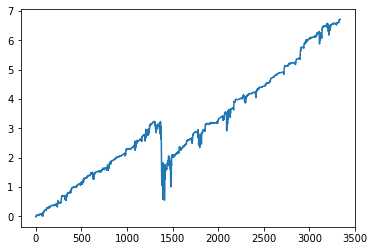

In [117]:
plt.plot(nd_dailyreturns)

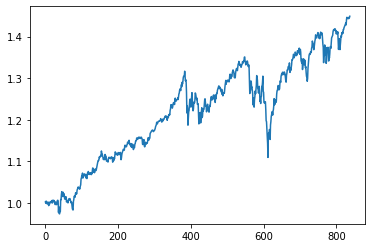

In [94]:
nd_dailyreturns = np.mean(y_test, axis=1)
nd_dailyreturns = np.cumprod(1+nd_dailyreturns)
plt.plot(nd_dailyreturns)

In [16]:
temp.shape

(3338, 11)

In [17]:
print(temp)

[[ 0.39295208  0.03818881  0.08013953 ...  0.23250602  0.2040635
   0.2196502 ]
 [ 0.38809556  0.03623683  0.07968836 ...  0.22815469  0.21170667
   0.21789825]
 [ 0.36832154  0.00654863  0.07914226 ...  0.17778127  0.21149035
   0.19105348]
 ...
 [ 0.20609039 -0.0432375  -0.01839073 ...  0.01072161  0.22762057
   0.0743719 ]
 [ 0.21695746 -0.02695525 -0.01675374 ...  0.03305097  0.22877358
   0.09194614]
 [ 0.21169883 -0.00708692 -0.02188107 ...  0.05878905  0.23082173
   0.09494719]]


In [50]:
print(type(temp))
temp.shape

<class 'numpy.ndarray'>


(3338, 11)

In [111]:
df_weights = pd.DataFrame({'RWR': temp[:, 0], 'SPY': temp[:, 1], 'XLY': temp[:, 2],'XLP': temp[:, 3], 'XLE': temp[:, 4], 'XLF': temp[:, 5],
                          'XLV': temp[:, 6], 'XLB': temp[:, 7], 'XLI': temp[:, 8], 'XLU': temp[:, 9], 'XLK': temp[:, 10]})

In [112]:
df_weights.head()

,RWR,SPY,XLY,XLP,XLE,XLF,XLV,XLB,XLI,XLU,XLK
0,0.392952,0.038189,0.080140,0.209323,-0.199084,0.060153,0.069484,0.316681,0.232506,0.204064,0.219650
1,0.388096,0.036237,0.079688,0.206333,-0.190544,0.056684,0.057118,0.315022,0.228155,0.211707,0.217898
2,0.368322,0.006549,0.079142,0.209285,-0.214843,0.042336,0.064119,0.292134,0.177781,0.211490,0.191053
3,0.349678,-0.009912,0.076323,0.208049,-0.224756,0.034939,0.064786,0.275306,0.146291,0.214622,0.170635
4,0.271740,-0.031868,0.046996,0.179195,-0.219620,0.028942,0.079269,0.202763,0.083909,0.216616,0.100834


In [92]:
#Normalizing the weights
df_weights.div(df_weights.sum(axis=1), axis=0)

,RWR,SPY,XLY,XLP,XLE,XLF,XLV,XLB,XLI,XLU,XLK
0,0.241957,0.023514,0.049345,0.128889,-0.122584,0.037039,0.042784,0.194994,0.143164,0.125650,0.135248
1,0.241594,0.022558,0.049607,0.128445,-0.118616,0.035286,0.035557,0.196105,0.142029,0.131790,0.135644
2,0.258042,0.004588,0.055446,0.146623,-0.150516,0.029660,0.044921,0.204666,0.124552,0.148168,0.133850
3,0.267755,-0.007590,0.058442,0.159307,-0.172100,0.026754,0.049608,0.210807,0.112018,0.164340,0.130658
4,0.283425,-0.033238,0.049017,0.186900,-0.229064,0.030186,0.082677,0.211481,0.087517,0.225930,0.105169
...,...,...,...,...,...,...,...,...,...,...,...
3333,0.304853,-0.093539,-0.028162,0.189956,-0.297956,0.067613,0.254667,0.173598,0.008649,0.353979,0.066342
3334,0.301139,-0.075563,-0.021485,0.175283,-0.260424,0.062602,0.218574,0.167146,0.011376,0.326454,0.094897
3335,0.293480,-0.061572,-0.026189,0.165424,-0.237225,0.063504,0.202168,0.155094,0.015268,0.324140,0.105908
3336,0.275798,-0.034266,-0.021297,0.148336,-0.195839,0.062536,0.165414,0.149602,0.042015,0.290818,0.116883


In [113]:
df_weights.shape

(3338, 11)

In [116]:
#Z = pd.concat([df_portval,df_weights], axis=1, sort=True)
#df_pnl = df_weights.mul(df_portval)
df_pnl = z_dash.mul(df_weights.reindex(z_dash.index).values,axis=1)

#cl.reindex(df.index).values,axis=1

In [122]:
df_dailyret = df_pnl.sum(axis = 1, skipna = True)
df_dailyret.head()
#print(type(df_dailyret))

0   -0.014415
1   -0.023957
2   -0.007168
3    0.007660
4   -0.016030
dtype: float64

In [123]:
df_dailyret.sum()

2.7740196440414824

In [125]:
sr_cumlativepnl = df_dailyret.cumsum()
print(sr_cumlativepnl.head())

0   -0.014415
1   -0.038372
2   -0.045540
3   -0.037880
4   -0.053910
dtype: float64


In [54]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

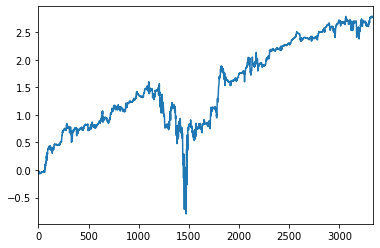

In [129]:
sr_cumlativepnl.plot()

# Hyper parameter optimization

In [20]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(layer1=50): 
    lstm_model = Sequential()
    lstm_model.add(LSTM(layer1, input_shape=(10,11), return_sequences=True))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(LSTM(50))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(25, activation='tanh'))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(11, activation='tanh'))
    lstm_model.compile(loss=sharpe_ratio_loss2, optimizer='rmsprop')
    return lstm_model

model = KerasRegressor(build_fn=create_model, epochs=5, batch_size=10, verbose=0)

layer1 = [40,50]
param_grid = dict(layer1=layer1)

In [22]:
from keras.wrappers.scikit_learn import KerasRegressor

class KerasRegressorGenerator(KerasRegressor):
    def fit(self,X,y,**kwargs):
        self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
        self.trained_model = self.model.fit_generator(X)
        return self
    
    def predict(X):
        return self.trained_model.fit_generator(X)
    

In [25]:
def create_model(layer1=50): 
    lstm_model = Sequential()
    lstm_model.add(LSTM(layer1, input_shape=(10,33), return_sequences=True))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(LSTM(50))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(25, activation='tanh'))
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(11, activation='tanh'))
    lstm_model.compile(loss=sharpe_ratio_loss2, optimizer='rmsprop')
    return lstm_model

model = KerasRegressorGenerator(build_fn=create_model, epochs=3, batch_size=10, verbose=0)
model.fit(train_data_gen,test_data_gen)

Epoch 1/1
152/152 [==============================] - 4s 26ms/step - loss: -0.8036


In [1]:
from skopt import BayesSearchCV

C:\Users\vinay\AppData\Local\Continuum\anaconda3\envs\ml_gpu\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
BayesSearchCV?

In [5]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

# Dump to run model.fit instead of generator first

In [3]:
TIME_STEPS = 10  #Look at past 10 time steps
BATCH_SIZE = 22 #Optimize for monthly sharpe ratio

#https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944
def build_timeseries(df_prices, mom_window=10, forward_return=1):
    X_temp = df_prices/df_prices.shift(mom_window) - 1 
    y_temp = df_prices.shift(-1*forward_return)/df_prices - 1    #Might have to take an extra day lag to make it tradable
    
    index_slice = X_temp.notnull().any(axis=1) & y_temp.notnull().any(axis=1)   #Remove Nan 
    X_temp = X_temp[index_slice]
    y_temp = y_temp[index_slice]
    
    dim_0 = X_temp.shape[0] - TIME_STEPS
    dim_1 = X_temp.shape[1]
    
    X = np.zeros((dim_0, TIME_STEPS, dim_1))
    #y = np.zeros(dim_0, df_prices.shape[1])  #Predict as many as number of stocks
    for i in range(dim_0):
        X[i] = X_temp[i:i+TIME_STEPS]
        
    y = y_temp[TIME_STEPS:]
    
    return X, y

In [4]:
X,y = build_timeseries(df_prices)
print(X.shape)
print(y.shape)

(4227, 10, 11)
(4227, 11)


In [44]:
a=lstm_model.predict_generator(test_data_gen)

In [37]:
a.shape

(828, 11)

In [27]:
y_test.shape

(838, 11)

In [15]:
y_test

array([[ 9.81375744e-05,  4.16300960e-03,  4.09668784e-04, ...,
        -5.76258148e-03,  9.06023455e-03,  4.19046697e-03],
       [ 2.35330335e-03, -3.77713150e-03, -6.14368227e-03, ...,
         5.98896178e-03,  2.94819221e-03, -2.69995045e-03],
       [ 9.19615775e-03,  4.48520582e-03,  2.67858813e-03, ...,
         1.32515581e-02,  2.00428562e-03,  4.18388462e-03],
       ...,
       [-9.07140398e-03,  2.10797433e-03,  5.15974616e-03, ...,
         2.44421588e-03,  6.01646303e-03, -6.60617756e-04],
       [ 8.46540645e-03,  3.23644348e-04, -5.79563632e-03, ...,
         1.47919350e-02,  1.15413507e-03, -3.14027664e-03],
       [ 8.78478822e-03,  1.45578027e-03,  6.16254041e-03, ...,
         3.52396636e-03,  1.04822222e-04,  4.31073766e-03]])

In [45]:
max(map(max,a))

0.9822406